In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# df_all = pd.read_csv('../reports/lstm_tuning_windows/results.csv')
df_all = pd.read_csv('/tmp/lstm_tuning_results.csv')

In [3]:
df_all.sort_values('smape')

,input_len,direction,size,depth,num,epoch,ensemble,smape,mase*
1806,18,bi,256,2,6.0,9,False,13.189401,2.671092
566,18,bi,256,2,6.0,9,False,13.189401,2.671092
6974,18,uni,256,3,3.0,8,False,13.208804,2.673714
1114,18,uni,256,3,3.0,8,False,13.208804,2.673714
274,18,uni,256,3,3.0,8,False,13.208804,2.673714
...,...,...,...,...,...,...,...,...,...
4758,18,uni,128,4,2.0,5,False,18.186094,3.591660
6692,18,uni,64,4,6.0,7,False,18.269536,3.605566
4718,18,uni,128,4,0.0,5,False,18.345795,3.634925
4608,18,uni,128,4,3.0,5,False,18.438642,3.664549


In [24]:
df = df_all[(df_all['ensemble'] == True)]
df = df[df['num'].isna()]

## Direction

<AxesSubplot:xlabel='direction', ylabel='smape'>

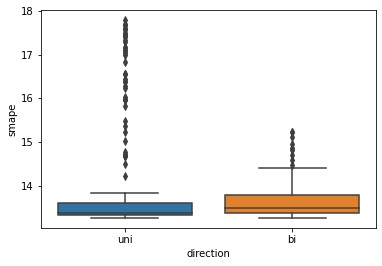

In [25]:
sns.boxplot(x='direction', y='smape', data=df)

In [26]:
df_best = df[df['direction'] == 'bi']

## Size

<AxesSubplot:xlabel='size', ylabel='smape'>

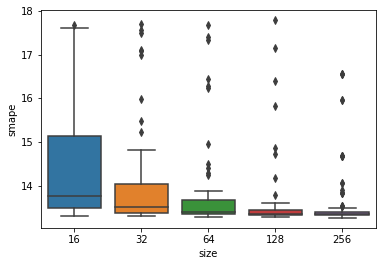

In [27]:
sns.boxplot(x='size', y='smape', data=df)

<AxesSubplot:xlabel='size', ylabel='smape'>

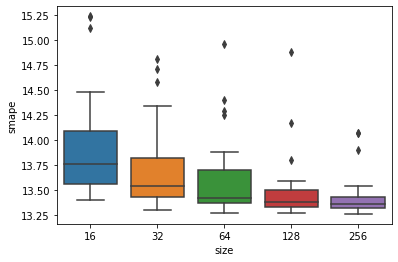

In [28]:
sns.boxplot(x='size', y='smape', data=df_best)

In [29]:
df_best_2 = df_best[df_best['size'] == 256]

## Depth

<AxesSubplot:xlabel='depth', ylabel='smape'>

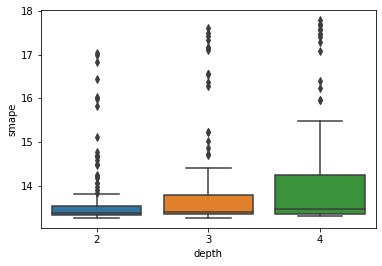

In [30]:
sns.boxplot(x='depth', y='smape', data=df)

<AxesSubplot:xlabel='depth', ylabel='smape'>

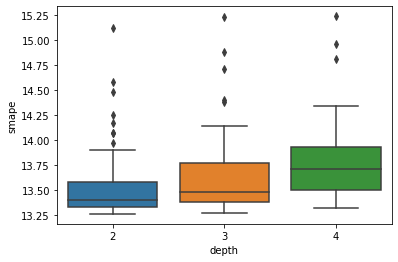

In [31]:
sns.boxplot(x='depth', y='smape', data=df_best)

<AxesSubplot:xlabel='depth', ylabel='smape'>

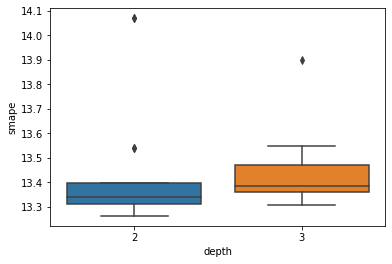

In [32]:
sns.boxplot(x='depth', y='smape', data=df_best_2)

In [33]:
df_best_3 = df_best_2[df_best_2['depth'] == 2]

## All together

<AxesSubplot:xlabel='size', ylabel='smape'>

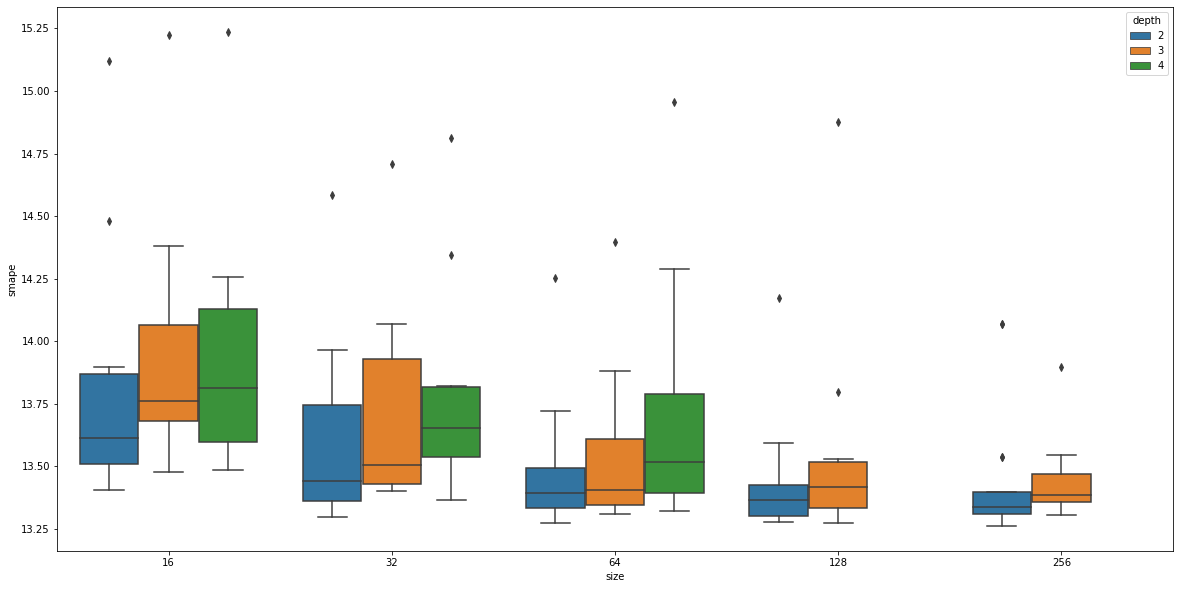

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='size', y='smape', data=df_best, hue='depth')

<AxesSubplot:xlabel='size', ylabel='smape'>

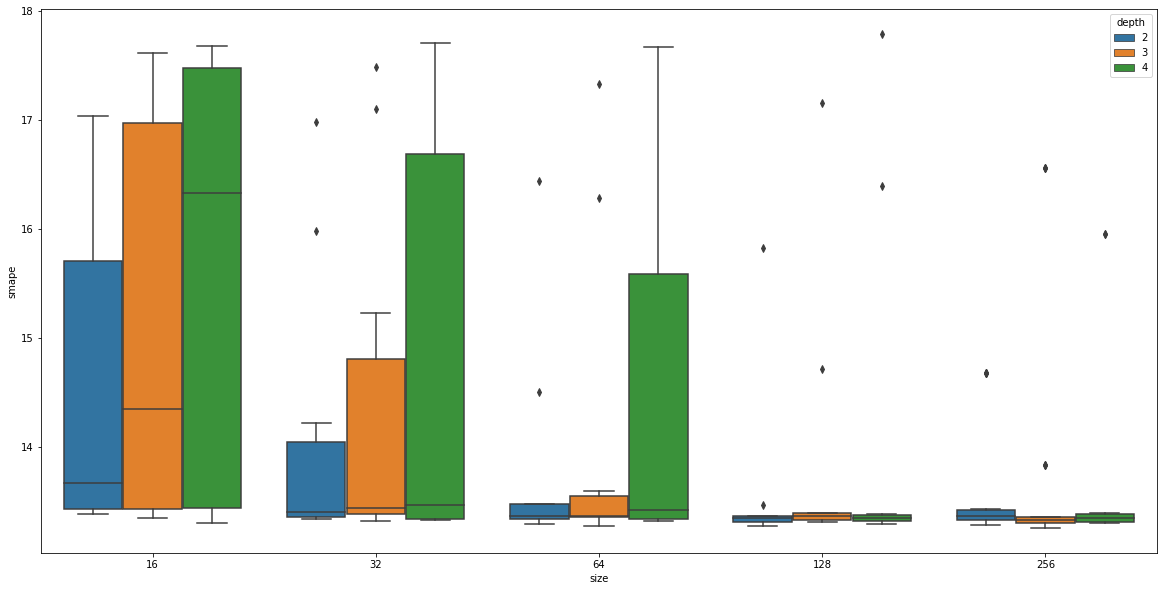

In [35]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='size', y='smape', data=df[df['direction'] == 'uni'], hue='depth')

## View best

In [21]:
df.sort_values('smape')

,input_len,direction,size,depth,num,epoch,ensemble,smape,mase*
2011,18,bi,128,2,4.0,6,True,13.230999,2.679673
2015,18,bi,128,2,4.0,8,True,13.235907,2.679911
2017,18,bi,128,2,4.0,9,True,13.237303,2.682308
2019,18,bi,128,2,4.0,10,True,13.237893,2.683810
95,18,uni,256,2,5.0,3,True,13.240248,2.689491
...,...,...,...,...,...,...,...,...,...
5231,18,uni,16,4,3.0,1,True,17.654292,3.434580
6514,18,uni,64,4,NaN,4,True,17.675770,3.432445
5256,18,uni,16,4,NaN,6,True,17.685190,3.432419
5884,18,uni,32,4,NaN,4,True,17.704417,3.443986
